In [48]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd


# Number of Supernova in Observed Data
num_of_SN = 31
"""Importing Observed Supernova Data """

# Redshift and Observed Mu Data

data = np.loadtxt("https://raw.githubusercontent.com/Priyatam-Kumar/MCMC_Assignment4/main/Redshift_Mu.txt")
z = data[:, 0]
Mu_Observed =data[:, 1]

# Covariance Matrix Data

Cov_Mat = np.loadtxt("https://raw.githubusercontent.com/Priyatam-Kumar/MCMC_Assignment4/main/Cov_Matrix.txt")
Cov_Mat = np.reshape(Cov_Mat, (num_of_SN, num_of_SN))


# CALCULATING INVERSE OF COVARIANCE MATRIX
Inv_Cov = np.empty([num_of_SN, num_of_SN])
Inv_Cov = np.linalg.inv(Cov_Mat)

# Creating an array for storing difference in Observed Mu and Calculated Mu Value from Model
Diff_Mu =  np.empty(num_of_SN)

# Defining Distance Modulus Model function
def Distance_Modu_Model(h, Omega_m, z ):
    DL_star = DL_dist(1, Omega_m, z)
    mu_model = 25.0 - 5.0*np.log10(h) + 5.0 * np.log10(DL_star)
    # Here DL_star is in Mpc.
    return mu_model

# Defining the Eta function, it is required to calculating DL
def Eta(a, Omega_m):
    s = ((1 - Omega_m)/Omega_m)**(1.0/3.0)
    Value = 2 * np.sqrt(1 + s**3) * (1/(a**4) - 0.1540 * s /(a**3 )
            + 0.4304 * (s**2) /(a**2) + 0.19097 * (s**3)/a + 0.066941 * s**4)**(-1/8)
    return Value

# Defining Luminosity distance
def DL_dist(h, Omega_m, z):
    distance = (3000/h)*(1.0 + z)*(Eta(1.0, Omega_m) - Eta(1.0/(1.0 + z), Omega_m))
    return distance




For Chain 1, Mean Omega_m = 0.2935423722035785    Mean h = 0.7032507570397776    Acceptance Ratio = 0.5112
    
For Chain 2, Mean Omega_m = 0.2983881480921106    Mean h = 0.7026357684363853    Acceptance Ratio = 0.5136
    
For Chain 3, Mean Omega_m = 0.29840280605945874    Mean h = 0.7024527046994737    Acceptance Ratio = 0.5036
    
For Chain 4, Mean Omega_m = 0.295259743709184    Mean h = 0.703188758393461    Acceptance Ratio = 0.5115
    
For Chain 5, Mean Omega_m = 0.2981175353517264    Mean h = 0.7028769359884964    Acceptance Ratio = 0.514
    
For Chain 6, Mean Omega_m = 0.293437496970913    Mean h = 0.703228216220817    Acceptance Ratio = 0.5285
    
For Chain 7, Mean Omega_m = 0.296703496686451    Mean h = 0.7027545133743425    Acceptance Ratio = 0.5124
    
For Chain 8, Mean Omega_m = 0.2954880981865146    Mean h = 0.703198238494159    Acceptance Ratio = 0.5162
    
For Chain 9, Mean Omega_m = 0.2941720636112271    Mean h = 0.7031036637731422    Acceptance Ratio = 0.5121
   

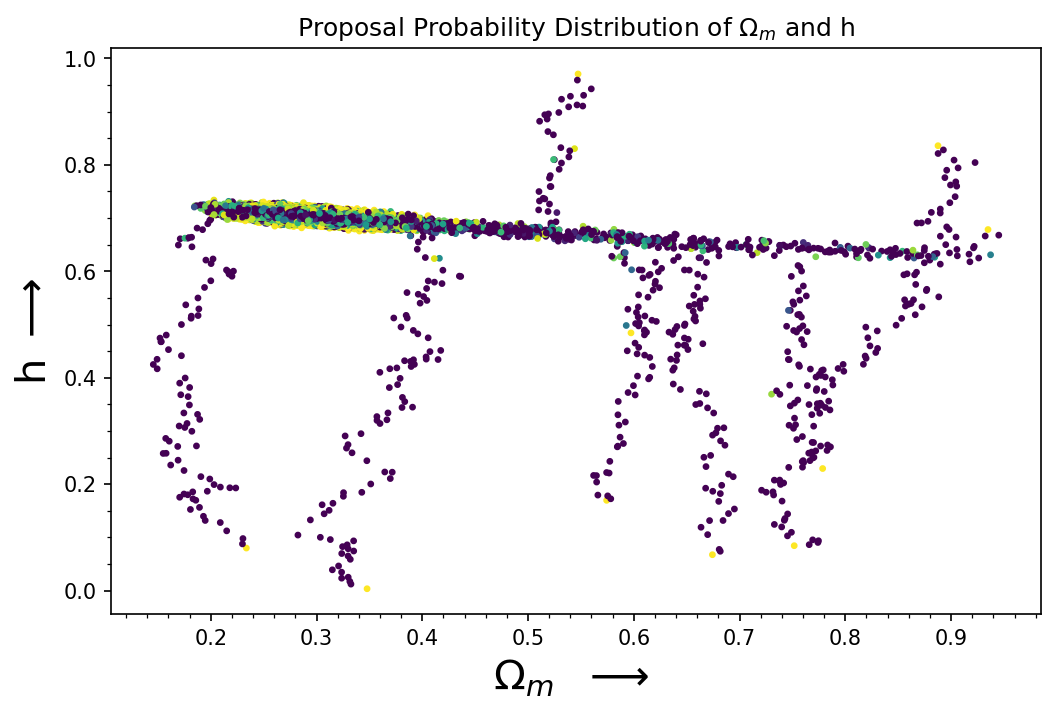

In [49]:

"""Bayesian Statistics"""
# Calculating the logaritham of Likelihood 
def log_likelihood(h, Omega_m):
    if h > 0 and h < 1 and 0 < Omega_m and Omega_m < 1 :
        for i in range(num_of_SN):
            Diff_Mu[i] = Mu_Observed[i] - Distance_Modu_Model(h, Omega_m, z[i])
            lnL = -0.5 * np.dot(Diff_Mu, np.dot(Inv_Cov , Diff_Mu))
    else:
        lnL = -1.0 * 10**100
    
    return lnL



plt.figure(figsize =[8, 5], dpi = 150)

# define Number of Random Walks/ Number of Chains
num_random_walk = 10 
Omega_m_mean = []
Omega_m_var = []
h_mean = []
h_var = []
Num_samples = 10000
for j in range(num_random_walk):

      # Random initial Point
      Omega_m_accept = [rnd.uniform(0, 1)]
      h_accept = [rnd.uniform(0, 1)]
      Prob = np.array([0])

      for i in range(Num_samples):
      # Generating Random numbers
            Omega_m_rand = np.random.normal(Omega_m_accept[-1], 0.01)
            h_rand = np.random.normal(h_accept[-1], 0.01)
            # Variable for storing probability

            Log_New_Like = log_likelihood(h_rand, Omega_m_rand)

            Accept_prob = min(float(np.exp(Log_New_Like - log_likelihood(h_accept[-1], Omega_m_accept[-1]))), 1.0)

            if rnd.uniform(0,1) < Accept_prob:
                  h_accept = np.append(h_accept, h_rand)
                  Omega_m_accept = np.append(Omega_m_accept, Omega_m_rand)
                  Prob = np.append(Prob, Accept_prob)



      # Rejecting Some initial Guasss

      burn_in = int(Num_samples/10)
      # Scatter plot of the samples:
      
      Omega_m_mean = np.append(Omega_m_mean, np.mean(Omega_m_accept[burn_in:]))
      Omega_m_var = np.append(Omega_m_var, np.var(Omega_m_accept[burn_in:]))
      h_mean = np.append(h_mean, np.mean(h_accept[burn_in:]))
      h_var = np.append(h_var, np.var(h_accept[burn_in:]))
      #plt.plot(Omega_m_accept[:], h_accept[:],c= 'g',linewidth=1, alpha = 0.2)
      plt.scatter(Omega_m_accept[:],h_accept[:], c = -0.5*np.exp(Prob[:]), s=5)

      plt.title(r"Proposal Probability Distribution of $\Omega_m$ and h")
      plt.xlabel(r'$\Omega_m  ~~ \longrightarrow$ ', fontsize = 20)
      plt.ylabel(r'h $\longrightarrow$', fontsize = 20)
      plt.minorticks_on()

      print(f"""For Chain {j+1}, Mean Omega_m = {np.mean(Omega_m_accept[burn_in:])}    Mean h = {np.mean(h_accept[burn_in:])}    Acceptance Ratio = {len(h_accept)/Num_samples}
    """)

plt.show()

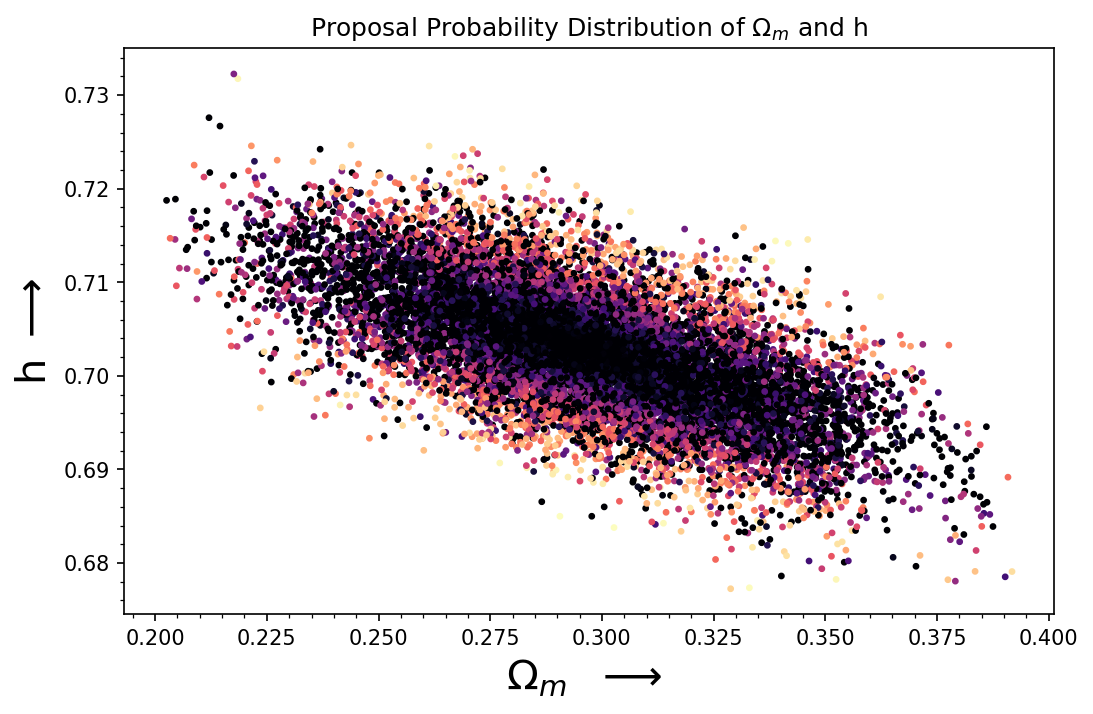

Acceptance Percenatge = 72.1 %


In [51]:

# Starting Sample 
Num_samples = 20000

# Random initial Point
Omega_m_accept = [rnd.uniform(0, 1)]
h_accept = [rnd.uniform(0, 1)]
Prob = np.array([0])

for i in range(Num_samples):
    # Generating Random numbers for next target point for random walker
    Omega_m_rand = np.random.normal(Omega_m_accept[-1], 0.005)
    h_rand = np.random.normal(h_accept[-1], 0.005)


    """ Calculating Probability at next target point """
    New_Log_Like = log_likelihood(h_rand, Omega_m_rand)

    """ Calculating Probability at current point """
    Current_Log_like = log_likelihood(h_accept[-1], Omega_m_accept[-1])


    Accept_prob = min(np.exp(New_Log_Like - Current_Log_like), 1.0)

    """ Generating a random Number for deciding weather we are accepting
    the new target point (Moving to this point) or not. """

    u = rnd.uniform(0,1)

    if  u < Accept_prob:
        h_accept = np.append(h_accept, h_rand)
        Omega_m_accept = np.append(Omega_m_accept, Omega_m_rand)
        Prob = np.append(Prob, Accept_prob)



# Rejecting Some initial Guasss

burn_in = int(Num_samples/10)
# Scatter plot of the samples
plt.figure(figsize =[8, 5], dpi = 150)
#plt.plot(Omega_m_accept[burn_in:], h_accept[burn_in:],c= 'm',linewidth=1, alpha = 0.5)
plt.scatter(Omega_m_accept[burn_in:],h_accept[burn_in:], c = -np.exp(Prob[burn_in:]),s=5, cmap='magma')

plt.title(r"Proposal Probability Distribution of $\Omega_m$ and h")
plt.xlabel(r'$\Omega_m  ~~ \longrightarrow$ ', fontsize = 20)
plt.ylabel(r'h $\longrightarrow$', fontsize = 20)
plt.minorticks_on()
#plt.savefig("Dis_fun.png")
plt.show()

print(f"Acceptance Percenatge = {len(h_accept)/Num_samples * 100} %", )


# Important Sampling

Consider a non-flat prior, so the target distribution is the posterior, not
the likelihood. We can still sample from the likelihood (as you have been doing), and construct
the posterior by weighting the points with the prior to get the target. This is an example of
importance sampling, where we sample from a different distribution from the one we eventually
want. Apply a prior on the Hubble constant to your chain, assuming a gaussian prior with mean
0.738 and standard deviation 0.024. Now plotting all the points in the chain will give a graph
which looks the same as your previous graphs, so what should you do? Compute the mean h, Ωm
with and without the prior.

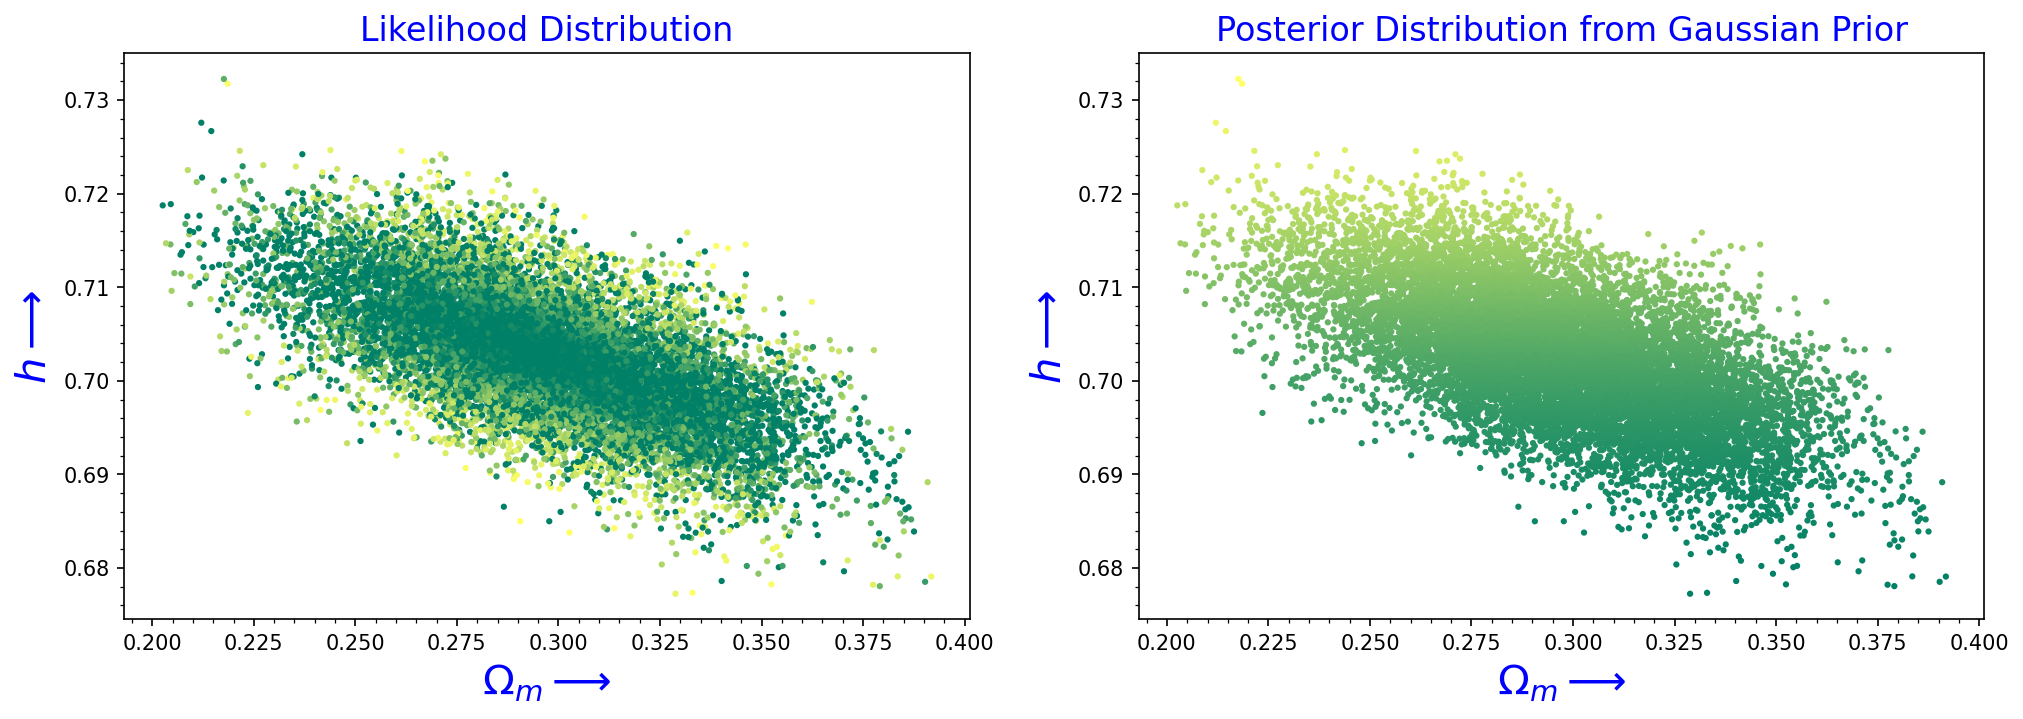

In [52]:
# Given Information
h_mean, h_std = 0.738, 0.024

# Prior Distribution Function
def Gaussian_PDF(h, mean, sigma):
      G = 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-(h-mean)**2/(2*sigma**2))
      return G

#Creating an empty array to store Weightage of all the samples using prior distribution funtion
weight_h = np.empty(len(h_accept))

for i in range(len(h_accept)):
    weight_h[i]  = Gaussian_PDF(h_accept[i], h_mean,h_std)

# weightted average can eihther be found using numpy predefined function as 
h_weighted_avg = np.dot(h_accept, weight_h)/np.sum(weight_h)
Omegam_weighted_avg = np.dot(Omega_m_accept, weight_h)/np.sum(weight_h)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5), dpi = 150)

ax1.scatter(Omega_m_accept[burn_in:], h_accept[burn_in:],s = 4, c =  -np.exp(Prob[burn_in:]), cmap = 'summer')
ax1.set_xlabel(r"$\Omega_m \longrightarrow$", fontsize = 20, color = 'blue')
ax1.set_ylabel(r"$h \longrightarrow$", fontsize = 20, color = 'blue')
ax1.set_title("Likelihood Distribution", fontsize = 16, color = 'blue')
ax1.minorticks_on()



ax2.scatter(Omega_m_accept[burn_in:], h_accept[burn_in:],s =4, c =  weight_h[burn_in:], cmap= 'summer')
ax2.set_xlabel(r"$\Omega_m \longrightarrow$", fontsize = 20, color = 'blue')
ax2.set_ylabel(r"$h \longrightarrow$", fontsize = 20, color = 'blue')
ax2.set_title("Posterior Distribution from Gaussian Prior", fontsize = 16, color = 'blue')
ax2.minorticks_on()


plt.show()


## Gelman-Rubin convergence Test
**Parameters**:
Let, M = Number of Chains,    N = Length of Chain 

**Definitions**:
*  Variance Between-chains:
$$
B \equiv \frac{N}{M-1} \sum_{m=1}^M \left( \widehat{\theta}_{m} - \widehat{\theta} \right)^2 \quad \mathrm~~~,~~~{where} \;\;\widehat{\theta} \equiv \frac{1}{M} \sum_{m=1}^M \widehat{\theta}_{m}
$$
* Variance Within-chains :
$$
W \equiv \frac{1}{M} \sum_{m=1}^M \sigma_m^2 \quad
$$

**Pooled Variance**:

$$\widehat{V} = \frac{N-1}{N}W + \frac{M+1}{MN}B$$

**Test**:
* Potential scale reduction factor: $R \equiv \sqrt{\frac{\widehat{\mathrm{V}}}{{W}}}$
* Test: $\widehat{R} \rightarrow 1$ as $n \rightarrow \infty$

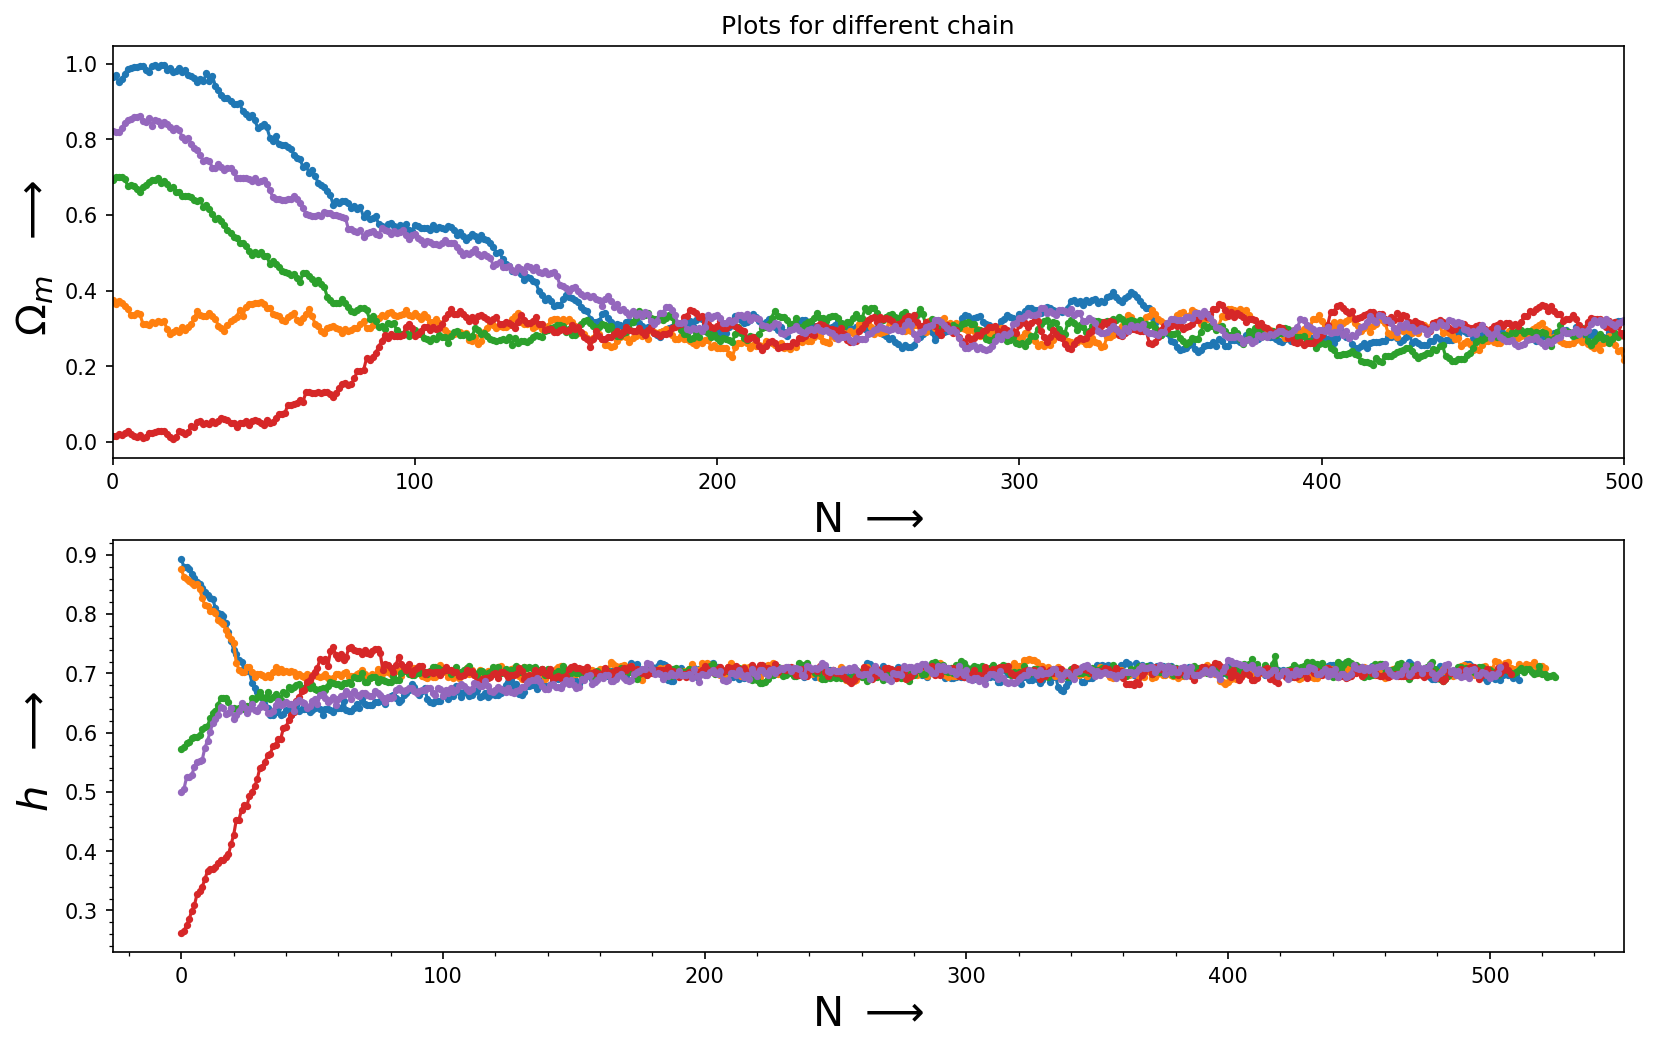

In [53]:
# Starting Sample 
import warnings
warnings.filterwarnings("ignore")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13,8), dpi = 150)

# define Number of Random Walks/ Number of Chains
num_random_walk = 5

Omega_m_mean = []
Omega_m_var = []
h_mean = []
h_var = []
Num_samples = 1000
for j in range(num_random_walk):

      # Random initial Point
      Omega_m_accept = [rnd.uniform(0, 1)]
      h_accept = [rnd.uniform(0, 1)]
      Prob = np.array([0])

      for i in range(Num_samples):
      # Generating Random numbers
            Omega_m_rand = np.random.normal(Omega_m_accept[-1], 0.01)
            h_rand = np.random.normal(h_accept[-1], 0.01)
            # Variable for storing probability

            Log_New_Like = log_likelihood(h_rand, Omega_m_rand)

            Accept_prob = min(float(np.exp(Log_New_Like - log_likelihood(h_accept[-1], Omega_m_accept[-1]))), 1.0)

            if rnd.uniform(0,1) < Accept_prob:
                  h_accept = np.append(h_accept, h_rand)
                  Omega_m_accept = np.append(Omega_m_accept, Omega_m_rand)
                  Prob = np.append(Prob, Accept_prob)



      # Rejecting Some initial Guasss

      n_burn = int(Num_samples/10)
      # Scatter plot of the samples:
      
      Omega_m_mean = np.append(Omega_m_mean, np.mean(Omega_m_accept[n_burn:]))
      Omega_m_var = np.append(Omega_m_var, np.var(Omega_m_accept[n_burn:]))
      h_mean = np.append(h_mean, np.mean(h_accept[n_burn:]))
      h_var = np.append(h_var, np.var(h_accept[n_burn:]))
      #plt.plot(Omega_m_accept[:], h_accept[:],c= 'g',linewidth=1, alpha = 0.2)
      #plt.scatter(Omega_m_accept[:],h_accept[:], c = -0.5*np.exp(Prob[:]), s=5)
      
      
      ax1.plot(range(len(Omega_m_accept)), Omega_m_accept, marker = '.', markersize = 5)
      ax1.set_title("Plots for different chain")
      ax1.set_ylabel(r'$\Omega_m  ~~ \longrightarrow$ ', fontsize = 20)
      ax1.set_xlabel(r'N $\longrightarrow$', fontsize = 20)
      ax1.set_xlim(0, 800)
      plt.minorticks_on()
      
      
      ax2.plot(range(len(h_accept)), h_accept, marker = '.', markersize = 5)
      ax2.set_ylabel(r'$h  ~~ \longrightarrow$ ', fontsize = 20)
      ax2.set_xlabel(r'N $\longrightarrow$', fontsize = 20)
      ax1.set_xlim(0, 500)
      plt.minorticks_on()
      
plt.show()



In [54]:

""" Gelman–Rubin convergence Test"""
# Chain length 
N = Num_samples

# Number of chains
M = num_random_walk
Omega_m_mean_all = np.mean(Omega_m_mean)
h_mean_all = np.mean(h_mean)
Omega_m_var_all = np.var(Omega_m_mean)
h_var_all = np.var(h_mean)

# print(f"Overall Mean of Omega_m = {Omega_m_mean_all}", f"\tOverall Variance of Omega_m = {Omega_m_var_all}")
# print(f"Overall Mean h = {h_mean_all}", f"\t \t Overall Variance of h = {h_var_all}")

"""Variance Between the Chains (B)  and within the chain (W)"""
B_Omega_m = (N/(M - 1)) * np.sum((Omega_m_mean - Omega_m_mean_all)**2)
W_Omega_m = 1/M * np.sum(Omega_m_var)

B_h = (N/(M - 1)) * np.sum((h_mean - h_mean_all)**2)
W_h = 1/M * np.sum(h_var)

""" Pooled Variance"""

V_cap_Omega = ((N-1)/N ) * W_Omega_m + (M + 1)/(M*N) * B_Omega_m
V_cap_h = ((N-1)/N ) * W_h + (M + 1)/(M*N) * B_h
"""The potential scale reduction factor (PSRF) is defined to be the ratio of V_cap and W"""
print("The potential scale reduction factor \n")
print("PSRF for Omega_m = ",np.sqrt(V_cap_Omega/W_Omega_m), "\n")
print("PSRF for h = ",np.sqrt(V_cap_h/W_h))


The potential scale reduction factor 

PSRF for Omega_m =  1.0882693724565715 

PSRF for h =  1.047611472834131
